In [1]:
main_df = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\Project2\\final_data2.csv")

# Without replacing withdraw with pass

In [2]:
names(main_df)

[1] "code_module.x.x"            "code_presentation.x.x"     
 [3] "id_student.x"               "date_registration"         
 [5] "date_unregistration"        "X"                         
 [7] "gender"                     "region"                    
 [9] "highest_education"          "imd_band"                  
[11] "age_band"                   "num_of_prev_attempts"      
[13] "studied_credits"            "disability"                
[15] "final_result"               "key"                       
[17] "sum_click"                  "NA_dataplus"               
[19] "NA_dualpane"                "NA_externalquiz"           
[21] "NA_folder"                  "NA_forumng"                
[23] "NA_glossary"                "NA_homepage"               
[25] "NA_htmlactivity"            "NA_oucollaborate"          
[27] "NA_oucontent"               "NA_ouelluminate"           
[29] "NA_ouwiki"                  "NA_page"                   
[31] "NA_questionnaire"           "NA_quiz"                   
[33] "NA_repeatactivity"          "NA_resource"               
[35] "NA_sharedsubpage"           "NA_subpage"                
[37] "NA_url"                     "weight"                    
[39] "CMA_count"                  "Exam_count"                
[41] "TMA_count"                  "TMA_score"                 
[43] "Exam_score"                 "CMA_Score"                 
[45] "module_presentation_length"

In [3]:
new= main_df[,-which(names(main_df) %in% c("id_student.x","X","key"))]

In [4]:
new=new[!new$final_result=="Withdrawn",]
new[new$final_result=="Distinction","final_result"] = "Pass"

In [5]:
write.csv(new,"C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\Project2\\cat2.csv", row.names = FALSE)

In [6]:
new = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\Project2\\cat2.csv")

In [21]:

## 70% of the sample size
smp_size <- floor(0.90 * nrow(new))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(new)), size = smp_size)

Train <- new[train_ind, ]
Test <- new[-train_ind, ]

row.names(Train) = NULL
row.names(Test)= NULL

In [15]:
library(caret)
library(ROSE)
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



# CART

In [22]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [23]:
# CART
set.seed(7)
fit.cart.unbalanced <- train(final_result~., data=Train, method="rpart",metric=metric, trControl=control)

In [24]:
# estimate skill of CART on the validation dataset
predictions_cart1 <- predict(fit.cart.unbalanced, Test)
confusionMatrix(predictions_cart1, Test$final_result)

Confusion Matrix and Statistics

          Reference
Prediction Fail Pass
      Fail  463  110
      Pass  200 1370
                                        
               Accuracy : 0.8553        
                 95% CI : (0.8397, 0.87)
    No Information Rate : 0.6906        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.6483        
                                        
 Mcnemar's Test P-Value : 4.307e-07     
                                        
            Sensitivity : 0.6983        
            Specificity : 0.9257        
         Pos Pred Value : 0.8080        
         Neg Pred Value : 0.8726        
             Prevalence : 0.3094        
         Detection Rate : 0.2161        
   Detection Prevalence : 0.2674        
      Balanced Accuracy : 0.8120        
                                        
       'Positive' Class : Fail          
                                        

Setting levels: control = Fail, case = Pass
Setting direction: controls < cases


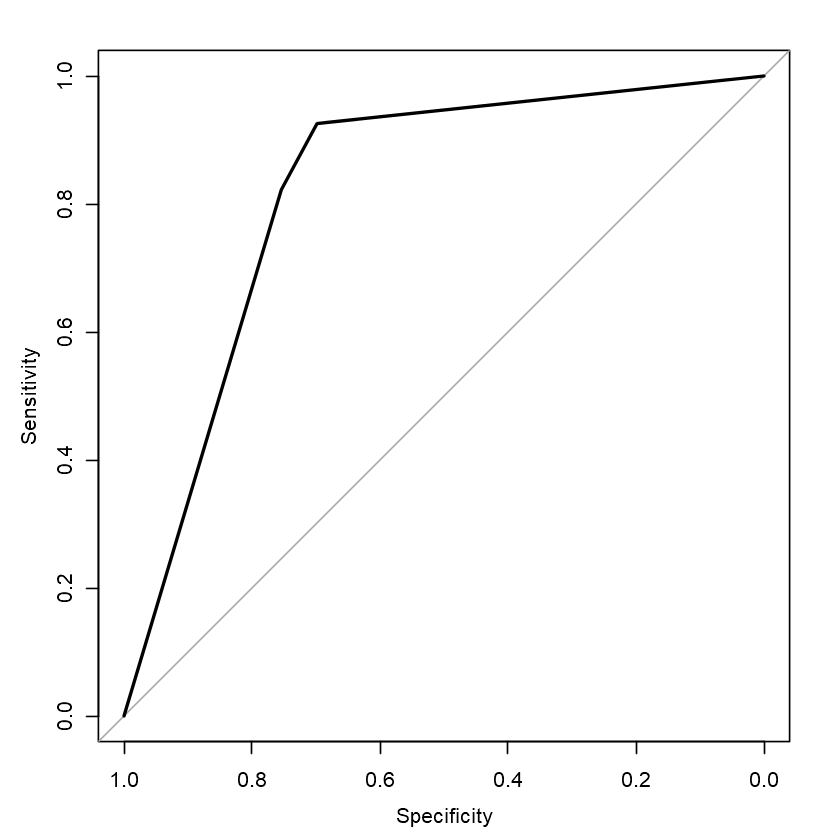

In [31]:
cart1 =  predict(fit.cart.unbalanced, Test,type="prob")
two=plot(roc(Test$final_result,cart1[,2]))

In [27]:
tom1= varImp(fit.cart.unbalanced)
tom1

rpart variable importance

  only 20 most important variables shown (out of 377)

                          Overall
weight                     100.00
TMA_count                   98.69
TMA_score                   91.48
NA_homepage                 74.14
sum_click                   64.83
CMA_count                   34.24
NA_quiz                     31.22
code_module.x.xGGG          17.91
studied_credits             13.47
`date_unregistration-148`    0.00
date_unregistration94        0.00
date_unregistration178       0.00
`date_unregistration-49`     0.00
date_unregistration235       0.00
date_unregistration213       0.00
date_unregistration192       0.00
`date_unregistration-66`     0.00
date_unregistration59        0.00
date_unregistration29        0.00
`date_unregistration-129`    0.00

In [110]:
prop.table(table(Train$final_result))
table(Train$final_result)


     Fail      Pass 
0.3151616 0.6848384 


 Fail  Pass 
 6076 13203 

# Lets try to under sample the data 

In [148]:
# Under Sampling
set.seed(222)
under_sam= ovun.sample(final_result~.,data =Train, method = "under", N=6076*2)$data
table(under_sam$final_result)


Pass Fail 
6076 6076 

In [29]:
# CART
set.seed(7)
fit.cart.balanced <- train(final_result~., data=under_sam, method="rpart",metric=metric, trControl=control)

In [30]:
# estimate skill of CART on the validation dataset
predictions_cart2 <- predict(fit.cart.balanced, Test)
confusionMatrix(predictions_cart2, Test$final_result)

Warning message in confusionMatrix.default(predictions_cart2, Test$final_result):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction Fail Pass
      Fail  480  134
      Pass  183 1346
                                          
               Accuracy : 0.8521          
                 95% CI : (0.8363, 0.8669)
    No Information Rate : 0.6906          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6466          
                                          
 Mcnemar's Test P-Value : 0.007019        
                                          
            Sensitivity : 0.7240          
            Specificity : 0.9095          
         Pos Pred Value : 0.7818          
         Neg Pred Value : 0.8803          
             Prevalence : 0.3094          
         Detection Rate : 0.2240          
   Detection Prevalence : 0.2865          
      Balanced Accuracy : 0.8167          
                                          
       'Positive' Class : Fail            
                        

Setting levels: control = Fail, case = Pass
Setting direction: controls > cases


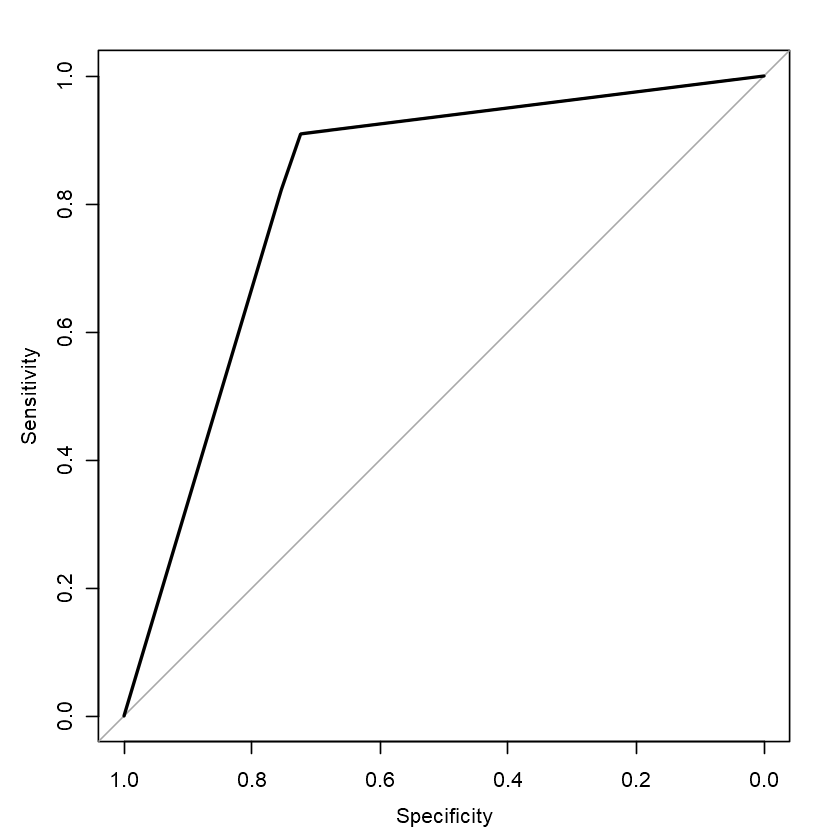

In [34]:
cart2 =  predict(fit.cart.balanced, Test,type="prob")
two=plot(roc(Test$final_result,cart2[,2]))

In [35]:
tom2= varImp(fit.cart.balanced)
tom2

rpart variable importance

  only 20 most important variables shown (out of 377)

                          Overall
weight                    100.000
TMA_score                  96.585
TMA_count                  81.531
NA_homepage                69.466
sum_click                  60.145
CMA_count                  22.054
NA_quiz                    17.831
code_module.x.xGGG         10.403
studied_credits             7.791
`date_unregistration-108`   0.000
`date_unregistration-137`   0.000
`date_unregistration-163`   0.000
date_unregistration114      0.000
date_unregistration11       0.000
date_unregistration65       0.000
date_unregistration152      0.000
disabilityY                 0.000
date_unregistration40       0.000
date_unregistration63       0.000
date_unregistration141      0.000

# Random Forrest:
## Unbalanced

In [36]:
names(new)

[1] "code_module.x.x"            "code_presentation.x.x"     
 [3] "date_registration"          "date_unregistration"       
 [5] "gender"                     "region"                    
 [7] "highest_education"          "imd_band"                  
 [9] "age_band"                   "num_of_prev_attempts"      
[11] "studied_credits"            "disability"                
[13] "final_result"               "sum_click"                 
[15] "NA_dataplus"                "NA_dualpane"               
[17] "NA_externalquiz"            "NA_folder"                 
[19] "NA_forumng"                 "NA_glossary"               
[21] "NA_homepage"                "NA_htmlactivity"           
[23] "NA_oucollaborate"           "NA_oucontent"              
[25] "NA_ouelluminate"            "NA_ouwiki"                 
[27] "NA_page"                    "NA_questionnaire"          
[29] "NA_quiz"                    "NA_repeatactivity"         
[31] "NA_resource"                "NA_sharedsubpage"          
[33] "NA_subpage"                 "NA_url"                    
[35] "weight"                     "CMA_count"                 
[37] "Exam_count"                 "TMA_count"                 
[39] "TMA_score"                  "Exam_score"                
[41] "CMA_Score"                  "module_presentation_length"

In [41]:
new_selected= new[,which(names(new) %in% c("weight","TMA_score","TMA_count","NA_homepage","sum_click","CMA_count","NA_quiz",
                             "code_module.x.x","code_presentation.x.x","studied_credits","final_result","age_band"))]

In [42]:
head(new_selected)

code_module.x.x,code_presentation.x.x,age_band,studied_credits,final_result,sum_click,NA_homepage,NA_quiz,weight,CMA_count,TMA_count,TMA_score
AAA,2013J,55<=,240,Pass,934,40,0,100,0,5,82.4
AAA,2013J,35-55,60,Pass,1435,80,0,100,0,5,65.4
AAA,2013J,35-55,60,Pass,2158,121,0,100,0,5,76.3
AAA,2013J,0-35,120,Pass,1428,104,0,100,0,5,72.5
AAA,2013J,0-35,90,Pass,1894,121,0,100,0,5,71.2
AAA,2013J,55<=,60,Pass,3158,142,0,100,0,5,79.0


In [139]:
## 90% of the sample size
smp_size <- floor(0.90 * nrow(new_selected))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(new_selected)), size = smp_size)

Train <- new_selected[train_ind, ]
Test <- new_selected[-train_ind, ]

row.names(Train) = NULL
row.names(Test)= NULL

In [47]:
# Random Forest with unbalanced data
set.seed(7)
fit.cart3 <- train(final_result~., data=Train, method="rf", metric=metric, trControl=control)

In [48]:
# estimate skill of CART on the validation dataset
predictions_cart3 <- predict(fit.cart3, Test)
confusionMatrix(predictions_cart3, Test$final_result)

Confusion Matrix and Statistics

          Reference
Prediction Fail Pass
      Fail  477   88
      Pass  186 1392
                                         
               Accuracy : 0.8721         
                 95% CI : (0.8573, 0.886)
    No Information Rate : 0.6906         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6881         
                                         
 Mcnemar's Test P-Value : 4.629e-09      
                                         
            Sensitivity : 0.7195         
            Specificity : 0.9405         
         Pos Pred Value : 0.8442         
         Neg Pred Value : 0.8821         
             Prevalence : 0.3094         
         Detection Rate : 0.2226         
   Detection Prevalence : 0.2636         
      Balanced Accuracy : 0.8300         
                                         
       'Positive' Class : Fail           
                                         

Setting levels: control = Fail, case = Pass
Setting direction: controls < cases


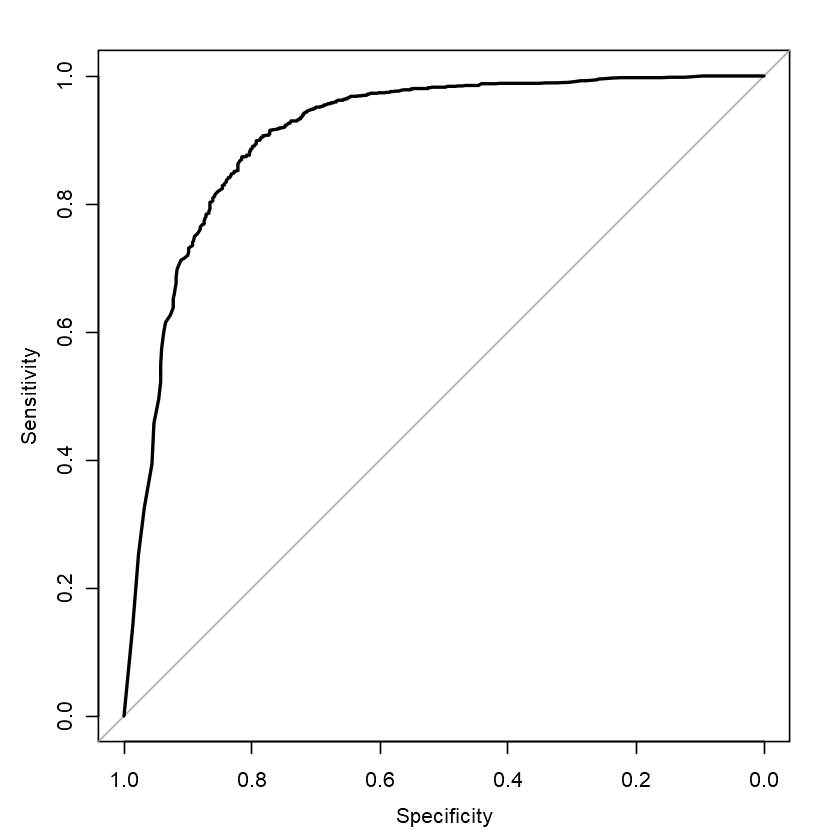

In [49]:
cart3 =  predict(fit.cart3, Test,type="prob")
two=  plot(roc(Test$final_result,cart3[,2]))

In [50]:
saveRDS(fit.cart3, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\rf_unbalanced_model.rds")

## RF with balanced data:

In [140]:
# Under Sampling
set.seed(222)
under_sam= ovun.sample(final_result~.,data =Train, method = "under", N=6076*2)$data
table(under_sam$final_result)


Pass Fail 
6076 6076 

In [53]:
head(under_sam)

code_module.x.x,code_presentation.x.x,age_band,studied_credits,final_result,sum_click,NA_homepage,NA_quiz,weight,CMA_count,TMA_count,TMA_score
FFF,2013J,35-55,60,Pass,8339,180,239,100,7,5,86.50
BBB,2013J,0-35,60,Pass,762,43,28,99,4,6,62.66
DDD,2013J,0-35,150,Pass,1958,140,0,200,0,6,68.50
FFF,2014J,0-35,120,Pass,1869,76,35,100,6,5,75.75
DDD,2014J,35-55,120,Pass,0,0,0,0,0,0,0.00
FFF,2014J,35-55,60,Pass,4334,128,73,100,7,5,84.75


In [54]:
# Random Forest with balanced data
set.seed(7)
fit.cart4 <- train(final_result~., data=under_sam, method="rf", metric=metric, trControl=control)

In [55]:
# estimate skill of rf on the validation dataset
predictions_cart4 <- predict(fit.cart4, Test)
confusionMatrix(predictions_cart4, Test$final_result)

Warning message in confusionMatrix.default(predictions_cart4, Test$final_result):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction Fail Pass
      Fail  527  167
      Pass  136 1313
                                          
               Accuracy : 0.8586          
                 95% CI : (0.8431, 0.8731)
    No Information Rate : 0.6906          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6733          
                                          
 Mcnemar's Test P-Value : 0.08481         
                                          
            Sensitivity : 0.7949          
            Specificity : 0.8872          
         Pos Pred Value : 0.7594          
         Neg Pred Value : 0.9061          
             Prevalence : 0.3094          
         Detection Rate : 0.2459          
   Detection Prevalence : 0.3238          
      Balanced Accuracy : 0.8410          
                                          
       'Positive' Class : Fail            
                        

Setting levels: control = Fail, case = Pass
Setting direction: controls < cases


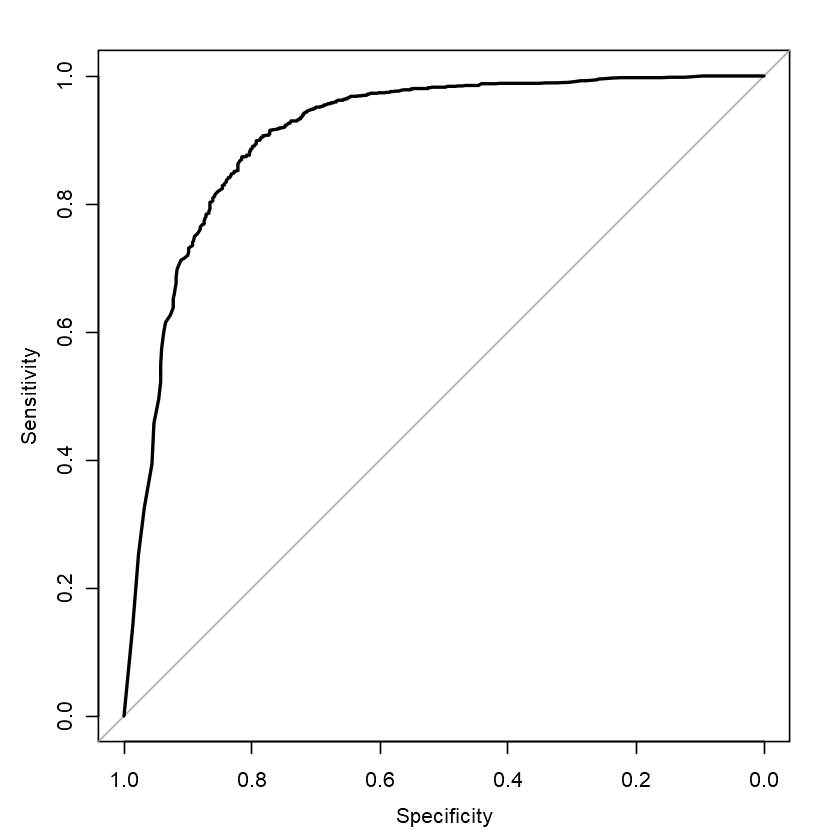

In [56]:
cart4 =  predict(fit.cart3, Test,type="prob")
two=  plot(roc(Test$final_result,cart4[,2]))

In [57]:
saveRDS(fit.cart4, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\rf_balanced_model.rds")

# Trying LDA method:

In [58]:
# Random Forest with balanced data
set.seed(7)
fit.LDA1 <- train(final_result~., data=under_sam, method="lda", metric=metric, trControl=control)

In [59]:
# estimate skill of rf on the validation dataset
predictions_lda1 <- predict(fit.LDA1, Test)
confusionMatrix(predictions_lda1, Test$final_result)

Warning message in confusionMatrix.default(predictions_lda1, Test$final_result):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction Fail Pass
      Fail  530  226
      Pass  133 1254
                                         
               Accuracy : 0.8325         
                 95% CI : (0.816, 0.8481)
    No Information Rate : 0.6906         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.6226         
                                         
 Mcnemar's Test P-Value : 1.2e-06        
                                         
            Sensitivity : 0.7994         
            Specificity : 0.8473         
         Pos Pred Value : 0.7011         
         Neg Pred Value : 0.9041         
             Prevalence : 0.3094         
         Detection Rate : 0.2473         
   Detection Prevalence : 0.3528         
      Balanced Accuracy : 0.8233         
                                         
       'Positive' Class : Fail           
                                         

Setting levels: control = Fail, case = Pass
Setting direction: controls > cases


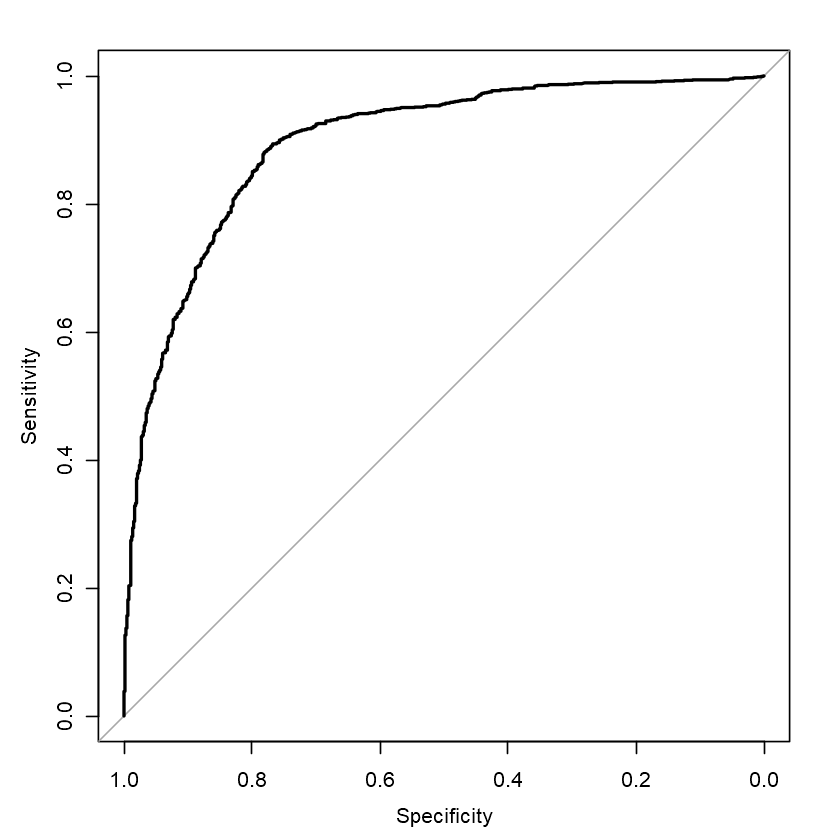

In [60]:
lda1 =  predict(fit.LDA1, Test,type="prob")
two=  plot(roc(Test$final_result,lda1[,2]))

In [61]:
saveRDS(fit.LDA1, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\LDA1_balanced_model.rds")

# Trying GLM on balanced data:

In [63]:
# GLM with balanced data
set.seed(7)
fit.GLM1 <- train(final_result~., data=under_sam, method="glm", metric=metric, trControl=control)

In [64]:
# estimate skill of rf on the validation dataset
predictions_GLM1 <- predict(fit.GLM1, Test)
confusionMatrix(predictions_GLM1, Test$final_result)

Warning message in confusionMatrix.default(predictions_GLM1, Test$final_result):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction Fail Pass
      Fail  539  241
      Pass  124 1239
                                          
               Accuracy : 0.8297          
                 95% CI : (0.8131, 0.8454)
    No Information Rate : 0.6906          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6199          
                                          
 Mcnemar's Test P-Value : 1.265e-09       
                                          
            Sensitivity : 0.8130          
            Specificity : 0.8372          
         Pos Pred Value : 0.6910          
         Neg Pred Value : 0.9090          
             Prevalence : 0.3094          
         Detection Rate : 0.2515          
   Detection Prevalence : 0.3640          
      Balanced Accuracy : 0.8251          
                                          
       'Positive' Class : Fail            
                        

Setting levels: control = Fail, case = Pass
Setting direction: controls > cases


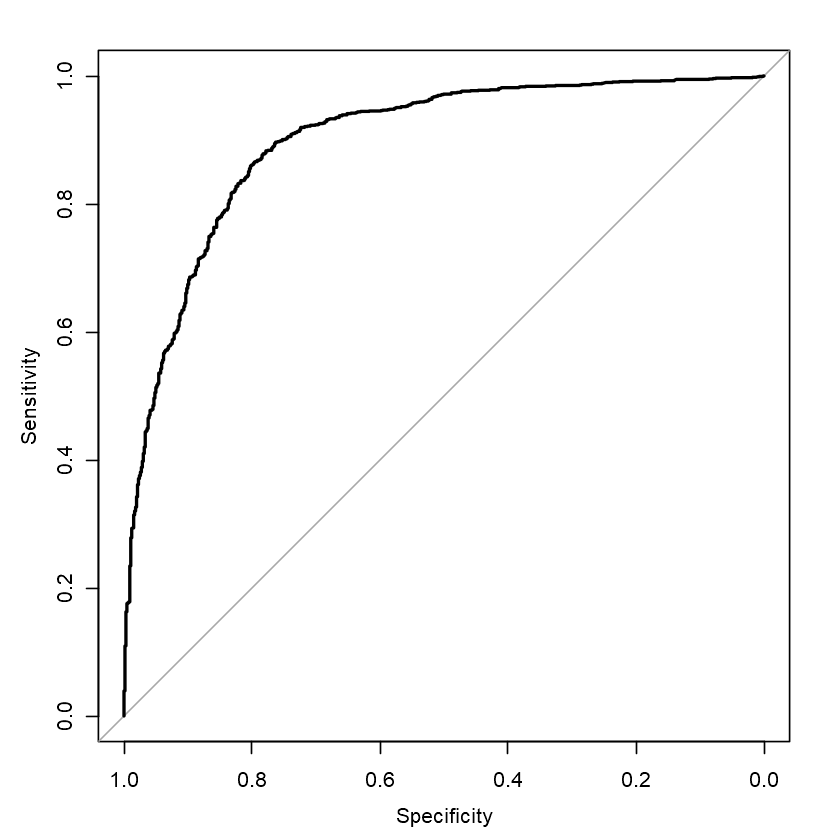

In [65]:
GLM1 =  predict(fit.GLM1, Test,type="prob")
two=  plot(roc(Test$final_result,GLM1[,2]))

In [66]:
saveRDS(fit.GLM1, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\GLM1_balanced_model.rds")

# GBM Model with balanced:

In [67]:
# GLM with balanced data
set.seed(7)
fit.GBM1 <- train(final_result~., data=under_sam, method="gbm", metric=metric, trControl=control)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3197             nan     0.1000    0.0335
     2        1.2648             nan     0.1000    0.0277
     3        1.2177             nan     0.1000    0.0236
     4        1.1784             nan     0.1000    0.0198
     5        1.1441             nan     0.1000    0.0168
     6        1.1132             nan     0.1000    0.0146
     7        1.0880             nan     0.1000    0.0123
     8        1.0674             nan     0.1000    0.0101
     9        1.0479             nan     0.1000    0.0096
    10        1.0312             nan     0.1000    0.0082
    20        0.9230             nan     0.1000    0.0031
    40        0.8469             nan     0.1000    0.0011
    60        0.8091             nan     0.1000    0.0008
    80        0.7867             nan     0.1000    0.0004
   100        0.7720             nan     0.1000    0.0002
   120        0.7598             nan     0.1000    0.0001
   140        

In [68]:
# estimate skill of rf on the validation dataset
predictions_GBM1 <- predict(fit.GBM1, Test)
confusionMatrix(predictions_GBM1, Test$final_result)

Warning message in confusionMatrix.default(predictions_GBM1, Test$final_result):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction Fail Pass
      Fail  545  200
      Pass  118 1280
                                          
               Accuracy : 0.8516          
                 95% CI : (0.8358, 0.8664)
    No Information Rate : 0.6906          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6642          
                                          
 Mcnemar's Test P-Value : 5.566e-06       
                                          
            Sensitivity : 0.8220          
            Specificity : 0.8649          
         Pos Pred Value : 0.7315          
         Neg Pred Value : 0.9156          
             Prevalence : 0.3094          
         Detection Rate : 0.2543          
   Detection Prevalence : 0.3476          
      Balanced Accuracy : 0.8434          
                                          
       'Positive' Class : Fail            
                        

Setting levels: control = Fail, case = Pass
Setting direction: controls > cases


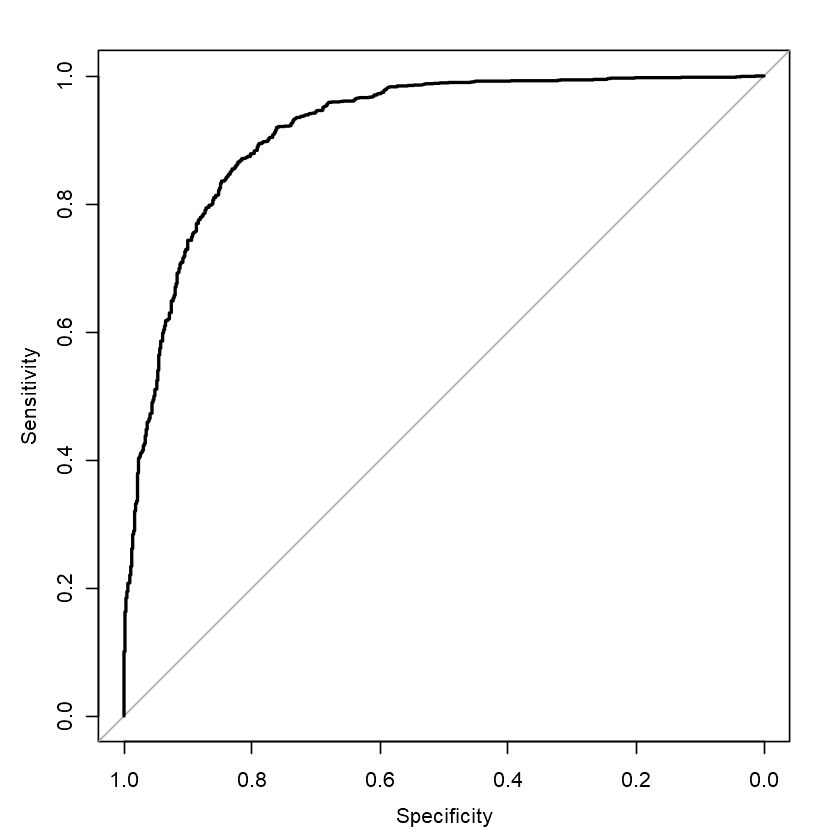

In [69]:
GBM1 =  predict(fit.GBM1, Test,type="prob")
two=  plot(roc(Test$final_result,GBM1[,2]))

In [70]:
saveRDS(fit.GBM1, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\GBM1_balanced_model.rds")

In [108]:
roc_obj <- roc(Test$final_result, GBM1[,1])
auc(roc_obj)

Setting levels: control = Fail, case = Pass
Setting direction: controls < cases


Area under the curve: 0.916

In [109]:
roc_obj <- roc(Test$final_result, lda1[,1])
auc(roc_obj)

Setting levels: control = Fail, case = Pass
Setting direction: controls < cases


Area under the curve: 0.8954

In [110]:
roc_obj <- roc(Test$final_result, GLM1[,1])
auc(roc_obj)

Setting levels: control = Fail, case = Pass
Setting direction: controls < cases


Area under the curve: 0.8975

In [114]:
roc_rf <- roc(Test$final_result, cart4[,1])
auc(roc_obj)

Setting levels: control = Fail, case = Pass
Setting direction: controls > cases


Area under the curve: 0.8975

# Running SVM on balanced:

In [116]:
# GLM with balanced data
set.seed(7)
fit.SVM1 <- train(final_result~., data=under_sam, method="svmRadial", metric=metric, trControl=control)

In [117]:
# estimate skill of rf on the validation dataset
predictions_SVM1 <- predict(fit.SVM1, Test)
confusionMatrix(predictions_SVM1, Test$final_result)

Warning message in confusionMatrix.default(predictions_SVM1, Test$final_result):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction Fail Pass
      Fail  528  167
      Pass  135 1313
                                          
               Accuracy : 0.8591          
                 95% CI : (0.8436, 0.8735)
    No Information Rate : 0.6906          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6746          
                                          
 Mcnemar's Test P-Value : 0.07445         
                                          
            Sensitivity : 0.7964          
            Specificity : 0.8872          
         Pos Pred Value : 0.7597          
         Neg Pred Value : 0.9068          
             Prevalence : 0.3094          
         Detection Rate : 0.2464          
   Detection Prevalence : 0.3243          
      Balanced Accuracy : 0.8418          
                                          
       'Positive' Class : Fail            
                        

In [121]:
saveRDS(fit.SVM1, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\SVM1_balanced_model.rds")

In [118]:
SVM1 =  predict(fit.SVM1, Test,type="prob")
two=  plot(roc(Test$final_result,SVM1[,2]))

Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
"kernlab class probability calculations failed; returning NAs"Setting levels: control = Fail, case = Pass


ERROR: Error in roc.default(Test$final_result, SVM1[, 2]): Predictor must be numeric or ordered.


# Using withdrawn as fail

In [2]:
main_df = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\Project2\\final_data2.csv")

In [3]:
unique(main_df$final_result)

[1] Pass        Withdrawn   Fail        Distinction
Levels: Distinction Fail Pass Withdrawn

In [4]:
new_selected= main_df[,which(names(main_df) %in% c("weight","TMA_score","TMA_count","NA_homepage","sum_click","CMA_count","NA_quiz",
                             "code_module.x.x","code_presentation.x.x","studied_credits","age_band","final_result"))]

In [5]:
head(new_selected)
unique(new_selected$final_result)

code_module.x.x,code_presentation.x.x,age_band,studied_credits,final_result,sum_click,NA_homepage,NA_quiz,weight,CMA_count,TMA_count,TMA_score
AAA,2013J,55<=,240,Pass,934,40,0,100,0,5,82.4
AAA,2013J,35-55,60,Pass,1435,80,0,100,0,5,65.4
AAA,2013J,35-55,60,Pass,2158,121,0,100,0,5,76.3
AAA,2013J,0-35,120,Pass,1428,104,0,100,0,5,72.5
AAA,2013J,0-35,90,Pass,1894,121,0,100,0,5,71.2
AAA,2013J,55<=,60,Pass,3158,142,0,100,0,5,79.0


[1] Pass        Withdrawn   Fail        Distinction
Levels: Distinction Fail Pass Withdrawn

In [6]:
 new_selected[new_selected$final_result=="Distinction","final_result"] = "Pass"

In [7]:
 new_selected[new_selected$final_result=="Withdrawn","final_result"] = "Fail"

In [8]:
write.csv(new_selected,"C:\\Users\\shrey\\OneDrive\\Desktop\\with_withdraw.csv", row.names = FALSE)

In [9]:
DF = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\with_withdraw.csv", na.strings = c("","NA"))

In [10]:
library(dummies)
#making dummies for result:
dum = dummy(DF$final_result,sep="_")

dummies-1.5.6 provided by Decision Patterns

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

In [11]:
head(dum,2)

NA_Fail,NA_Pass
0,1
0,1


In [12]:
DF = cbind(DF,dum)

In [13]:
DF = DF[,-which(names(DF) %in% c("NA_Fail","final_result"))]

### Splitting:

In [14]:
table(DF$NA_Pass)
DF$NA_Pass = as.factor(DF$NA_Pass)


    0     1 
18051 14683 

In [15]:

## 90% of the sample size
smp_size <- floor(0.90 * nrow(DF))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(DF)), size = smp_size)

Train <- DF[train_ind, ]
Test <- DF[-train_ind, ]

row.names(Train) = NULL
row.names(Test)= NULL

## Running GBM on DATA with withdrawn as fail

In [209]:
# GLM with balanced data
set.seed(7)
fit.GBM2 <- train(NA_Pass~., data=Train, method="gbm", metric=metric, trControl=control)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2879             nan     0.1000    0.0439
     2        1.2160             nan     0.1000    0.0356
     3        1.1569             nan     0.1000    0.0291
     4        1.1091             nan     0.1000    0.0241
     5        1.0690             nan     0.1000    0.0198
     6        1.0322             nan     0.1000    0.0183
     7        1.0024             nan     0.1000    0.0150
     8        0.9754             nan     0.1000    0.0137
     9        0.9527             nan     0.1000    0.0109
    10        0.9308             nan     0.1000    0.0109
    20        0.8062             nan     0.1000    0.0037
    40        0.7276             nan     0.1000    0.0010
    60        0.6949             nan     0.1000    0.0008
    80        0.6769             nan     0.1000    0.0002
   100        0.6656             nan     0.1000    0.0001
   120        0.6579             nan     0.1000    0.0001
   140        

In [214]:
# estimate skill of rf on the validation dataset
predictions_GBM2 <- predict(fit.GBM2, Test)
confusionMatrix(predictions_GBM2,Test$NA_Pass)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1527  131
         1  256 1360
                                          
               Accuracy : 0.8818          
                 95% CI : (0.8702, 0.8927)
    No Information Rate : 0.5446          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7633          
                                          
 Mcnemar's Test P-Value : 2.914e-10       
                                          
            Sensitivity : 0.8564          
            Specificity : 0.9121          
         Pos Pred Value : 0.9210          
         Neg Pred Value : 0.8416          
             Prevalence : 0.5446          
         Detection Rate : 0.4664          
   Detection Prevalence : 0.5064          
      Balanced Accuracy : 0.8843          
                                          
       'Positive' Class : 0               
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


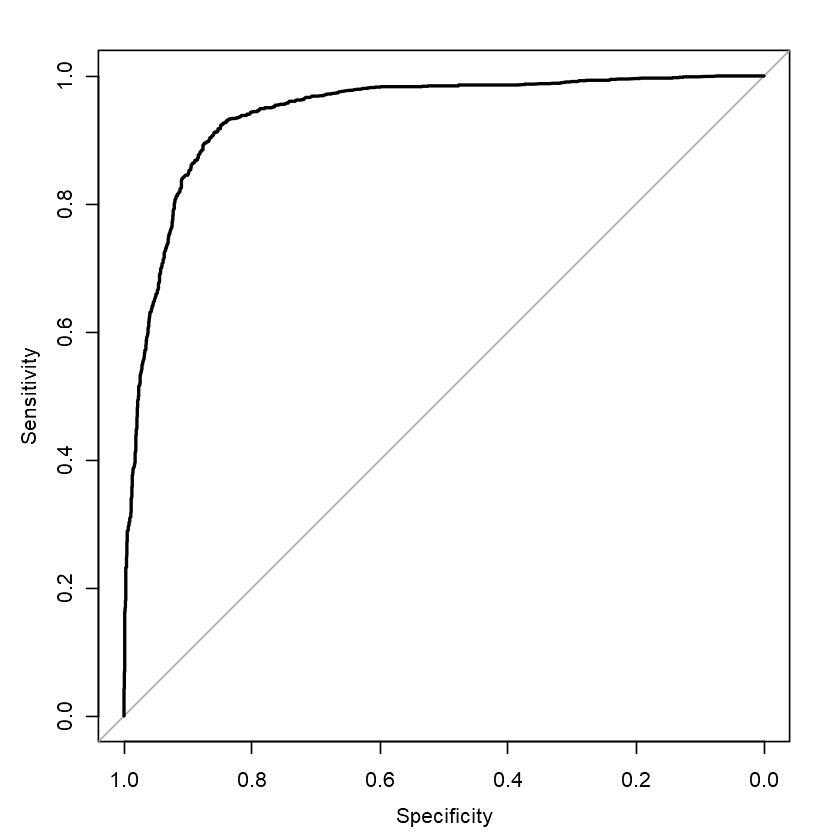

In [215]:
GBM2 =  predict(fit.GBM2, Test,type="prob")
two=  plot(roc(Test$NA_Pass,GBM2[,2]))

In [1]:
roc_obj <- roc(Test$NA_Pass, GBM2[,1])
auc(roc_obj)

ERROR: Error in roc(Test$NA_Pass, GBM2[, 1]): could not find function "roc"


In [ ]:
#Training with 

In [217]:
saveRDS(fit.GBM2, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\GBM_with_Withdraw_model.rds")

In [16]:
#Load saved model:
model_GBM2 = readRDS("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\GBM_with_Withdraw_model.rds")


In [21]:
df_target = data.frame(Test$NA_Pass)
#predicting from those models
gbm_pred1 =  predict(model_GBM2, Test)

# make a data frame for all the prediction
df_target = data.frame(Test$NA_Pass)

#add the prediction
df_target$gbm_pred1 = gbm_pred1

In [22]:
head(df_target)

Test.NA_Pass,gbm_pred1
1,1
1,1
1,1
1,1
1,1
1,1


In [23]:
#GBM
print("Results for GLM with 90:10 split \n")
p <- data.frame(Actual = df_target$Test.NA_Pass , Prediction = df_target$gbm_pred1)
p <- table(p)
p

accuracy <- (p[1,1] + p[2,2])/sum(p)
cat("Accuracy for GLM is =",accuracy,"\n")

precision <- (p[2,2]/(p[2,2] + p[1,2]))

cat("precision for GLM is =",precision,"\n")
recall <- (p[2,2]/(p[2,2] + p[2,1]))

cat("recall for GLM is =",recall,"\n")
f_score <- 2*((precision*recall)/(precision+recall))

cat("f_score for GLM is =",f_score,"\n")
g_score <- sqrt(precision*recall)

cat("g_score for GLM is =",g_score,"\n")

[1] "Results for GLM with 90:10 split \n"


      Prediction
Actual    0    1
     0 1527  256
     1  131 1360

Accuracy for GLM is = 0.881796 
precision for GLM is = 0.8415842 
recall for GLM is = 0.9121395 
f_score for GLM is = 0.8754425 
g_score for GLM is = 0.8761519 


In [26]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



# Calculation ROC

In [29]:
gbm_pred1 =  predict(model_GBM2, Test,type="prob")

roc_obj <- roc(Test$NA_Pass, gbm_pred1[,1])
auc(roc_obj)

Setting levels: control = 0, case = 1
Setting direction: controls > cases


Area under the curve: 0.9413

In [24]:
library(rpart)
library(rpart.plot)

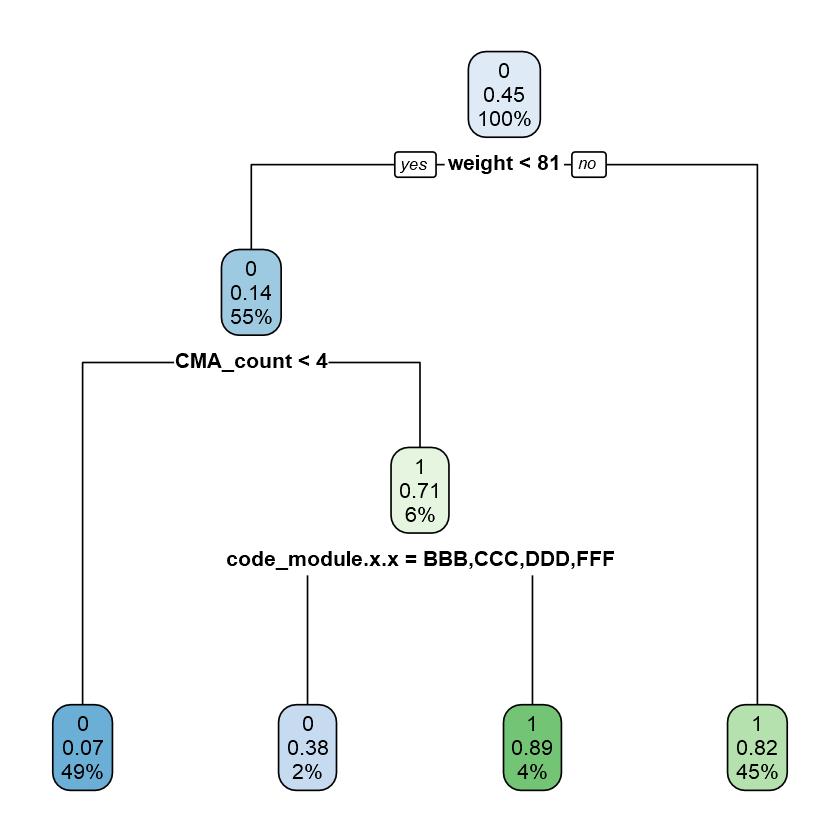

In [222]:
model.a <- rpart(NA_Pass~.,
data=Train,
method="class")
rpart.plot(model.a)

In [223]:
names(Train)

[1] "code_module.x.x"       "code_presentation.x.x" "age_band"             
 [4] "studied_credits"       "sum_click"             "NA_homepage"          
 [7] "NA_quiz"               "weight"                "CMA_count"            
[10] "TMA_count"             "TMA_score"             "NA_Pass"

## Running GLM:

In [32]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [33]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [35]:
# GLM with balanced data
set.seed(7)
fit.GLM2 <- train(NA_Pass~., data=Train, method="glm", metric=metric, trControl=control)

In [37]:
# estimate skill of glm on the validation dataset
predictions_GLM2 <- predict(fit.GLM2, Test)
confusionMatrix(predictions_GLM2,Test$NA_Pass)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1506  148
         1  277 1343
                                          
               Accuracy : 0.8702          
                 95% CI : (0.8582, 0.8815)
    No Information Rate : 0.5446          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7401          
                                          
 Mcnemar's Test P-Value : 5.335e-10       
                                          
            Sensitivity : 0.8446          
            Specificity : 0.9007          
         Pos Pred Value : 0.9105          
         Neg Pred Value : 0.8290          
             Prevalence : 0.5446          
         Detection Rate : 0.4600          
   Detection Prevalence : 0.5052          
      Balanced Accuracy : 0.8727          
                                          
       'Positive' Class : 0               
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


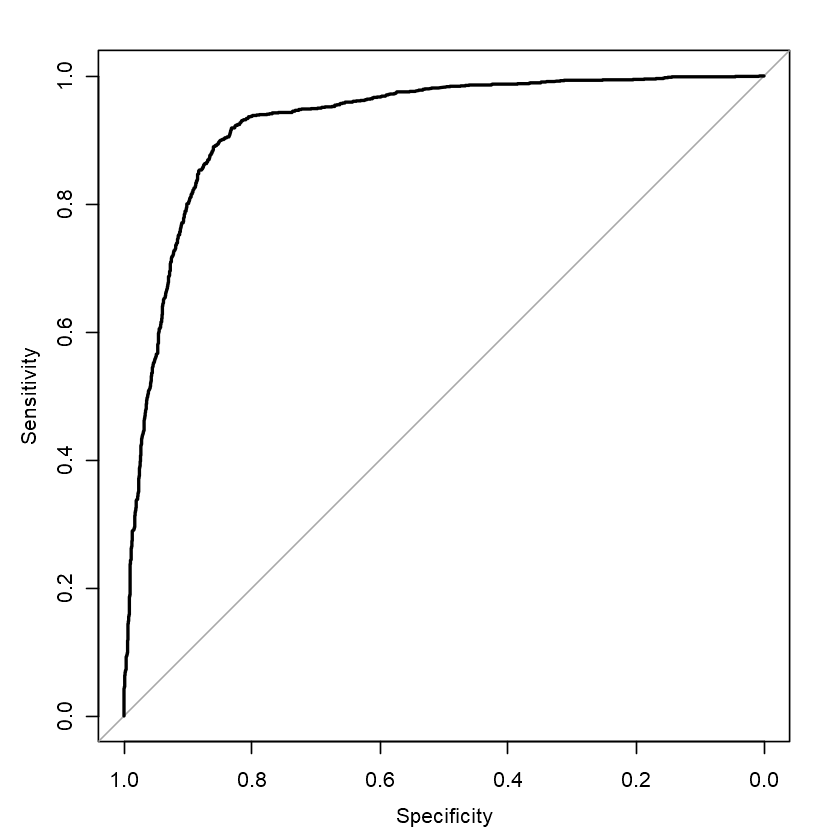

In [36]:
# Prediction
GLM2 =  predict(fit.GLM2, Test,type="prob")
two=  plot(roc(Test$NA_Pass,GLM2[,2]))

In [39]:
glm_pred1 =  predict(fit.GLM2, Test,type="prob")

roc_obj <- roc(Test$NA_Pass, glm_pred1[,1])
auc(roc_obj)

Setting levels: control = 0, case = 1
Setting direction: controls > cases


Area under the curve: 0.9263

In [57]:
#GLM
saveRDS(fit.GLM2, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\GLM_with_Withdraw_model.rds")

# RF training

In [40]:
# GLM with balanced data
set.seed(7)
fit.RF2 <- train(NA_Pass~., data=Train, method="rf", metric=metric, trControl=control)

In [41]:
# estimate skill of glm on the validation dataset
predictions_RF2 <- predict(fit.RF2, Test)
confusionMatrix(predictions_RF2,Test$NA_Pass)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1515  114
         1  268 1377
                                          
               Accuracy : 0.8833          
                 95% CI : (0.8718, 0.8941)
    No Information Rate : 0.5446          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7667          
                                          
 Mcnemar's Test P-Value : 4.951e-15       
                                          
            Sensitivity : 0.8497          
            Specificity : 0.9235          
         Pos Pred Value : 0.9300          
         Neg Pred Value : 0.8371          
             Prevalence : 0.5446          
         Detection Rate : 0.4627          
   Detection Prevalence : 0.4976          
      Balanced Accuracy : 0.8866          
                                          
       'Positive' Class : 0               
                        

In [42]:
RF_pred2 =  predict(fit.RF2, Test,type="prob")

roc_obj <- roc(Test$NA_Pass, RF_pred2[,1])
auc(roc_obj)

Setting levels: control = 0, case = 1
Setting direction: controls > cases


Area under the curve: 0.93

Setting levels: control = 0, case = 1
Setting direction: controls < cases


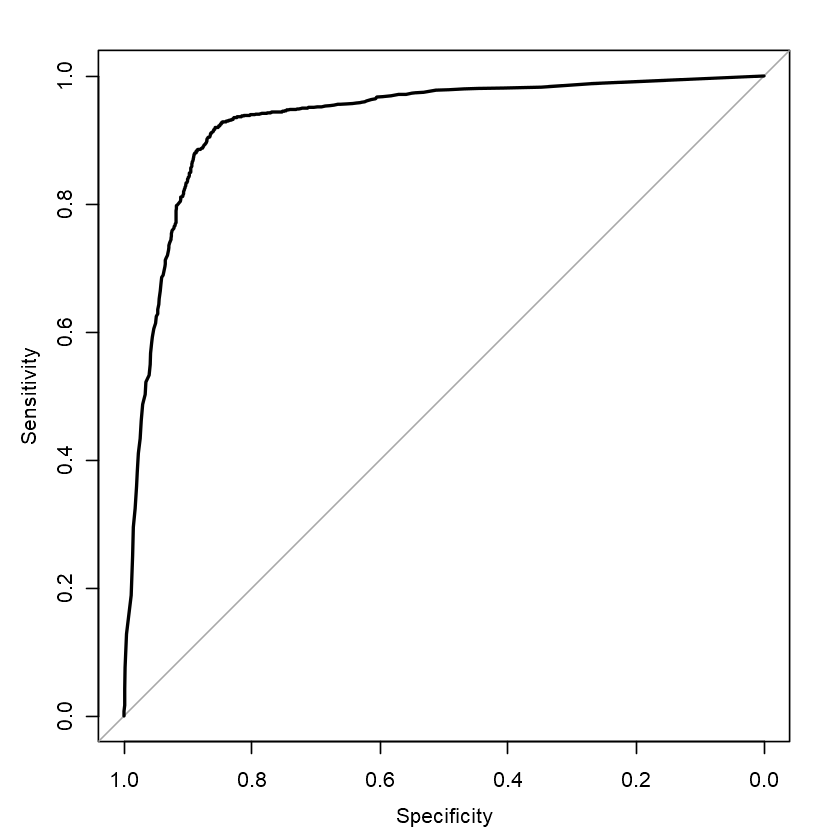

In [43]:
# Prediction
RF2 =  predict(fit.RF2, Test,type="prob")
two=  plot(roc(Test$NA_Pass,RF2[,2]))

In [58]:
#GLM
saveRDS(fit.RF2, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\RF_with_Withdraw_model.rds")

In [44]:
df_target = data.frame(Test$NA_Pass)
#predicting from those models
glm_pred1 =  predict(fit.GLM2, Test)
rf_pred1 = predict(fit.RF2,Test)
# make a data frame for all the prediction
df_target = data.frame(Test$NA_Pass)

#add the prediction
df_target$glm_pred1 = glm_pred1
df_target$rf_pred1 = rf_pred1



In [45]:
head(df_target)

Test.NA_Pass,glm_pred1,rf_pred1
1,1,1
1,1,1
1,1,1
1,1,1
1,1,1
1,1,1


In [46]:

#GLM
print("Results for GLM with 90:10 split \n")
p <- data.frame(Actual = df_target$Test.NA_Pass , Prediction = df_target$glm_pred1)
p <- table(p)
p

accuracy <- (p[1,1] + p[2,2])/sum(p)
cat("Accuracy for GLM is =",accuracy,"\n")

precision <- (p[2,2]/(p[2,2] + p[1,2]))

cat("precision for GLM is =",precision,"\n")
recall <- (p[2,2]/(p[2,2] + p[2,1]))

cat("recall for GLM is =",recall,"\n")
f_score <- 2*((precision*recall)/(precision+recall))

cat("f_score for GLM is =",f_score,"\n")
g_score <- sqrt(precision*recall)

cat("g_score for GLM is =",g_score,"\n")


#RF
print("Results for RF with 90:10 split \n")
p <- data.frame(Actual = df_target$Test.NA_Pass , Prediction = df_target$rf_pred1)
p <- table(p)
p

accuracy <- (p[1,1] + p[2,2])/sum(p)
cat("Accuracy for RF is =",accuracy,"\n")

precision <- (p[2,2]/(p[2,2] + p[1,2]))

cat("precision for RF is =",precision,"\n")
recall <- (p[2,2]/(p[2,2] + p[2,1]))

cat("recall for RF is =",recall,"\n")
f_score <- 2*((precision*recall)/(precision+recall))

cat("f_score for RF is =",f_score,"\n")
g_score <- sqrt(precision*recall)

cat("g_score for RF is =",g_score,"\n")

[1] "Results for GLM with 90:10 split \n"


      Prediction
Actual    0    1
     0 1506  277
     1  148 1343

Accuracy for GLM is = 0.8701894 
precision for GLM is = 0.8290123 
recall for GLM is = 0.9007378 
f_score for GLM is = 0.863388 
g_score for GLM is = 0.8641312 
[1] "Results for RF with 90:10 split \n"


      Prediction
Actual    0    1
     0 1515  268
     1  114 1377

Accuracy for RF is = 0.8833232 
precision for RF is = 0.8370821 
recall for RF is = 0.9235412 
f_score for RF is = 0.8781888 
g_score for RF is = 0.8792496 


In [54]:
#Load saved model:
fit.GBM2 = readRDS("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\project2\\GBM_with_Withdraw_model.rds")


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


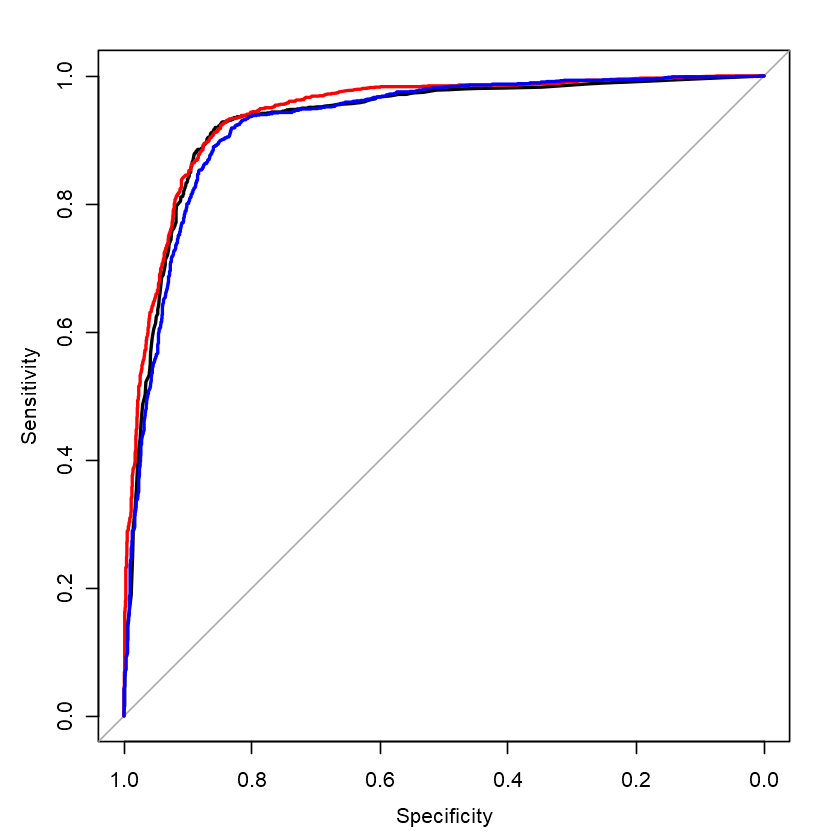

In [56]:
gbm_pred1 =  predict(fit.GBM2, Test,type="prob")
glm_pred1 =  predict(fit.GLM2, Test,type="prob")
rf_pred1 =  predict(fit.RF2, Test,type="prob")

one=plot(roc(Test$NA_Pass,rf_pred1[,2]))
two= lines(roc(Test$NA_Pass,gbm_pred1[,2]),col="red")
three = lines(roc(Test$NA_Pass,glm_pred1[,2]),col="BLUE")

0,1
0.03954621,0.9604538
0.20936817,0.7906318
0.20685904,0.7931410
0.05425395,0.9457460
0.10276003,0.8972400
0.27136862,0.7286314
